In [11]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#Ashish

In [12]:
df=pd.read_csv('C:/Users/Vishnu/Desktop/IIMK Kochi/QTR-5/PA/Advertising_MLR.csv')

In [13]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [15]:
df.count()

Unnamed: 0    200
TV            200
Radio         200
Newspaper     200
Sales         200
dtype: int64

In [16]:
df=df.drop_duplicates()

In [17]:
df.count()

Unnamed: 0    200
TV            200
Radio         200
Newspaper     200
Sales         200
dtype: int64

In [18]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [19]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [20]:
ndf=df.iloc[:,1:]

In [22]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [23]:
correlation_marix=ndf.corr()

In [37]:
print(correlation_marix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


<AxesSubplot:>

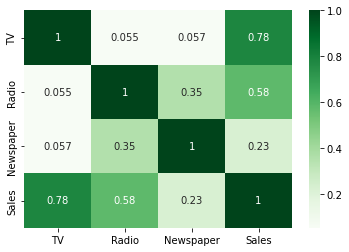

In [24]:
sns.heatmap(correlation_marix,cmap = 'Greens', annot = True)

In [51]:
#ndf.info()
print(ndf['TV'])

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64


In [77]:
import statsmodels.api as sm
y=ndf['Sales']
x=np.column_stack((ndf['TV'],ndf['Radio'],ndf['TV'],ndf['TV']*ndf['Radio']))
X = sm.add_constant(x)
M1 = sm.OLS(y, X).fit()
print(M1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 18 Jun 2023   Prob (F-statistic):          6.68e-146
Time:                        13:35:32   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.0

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score

M1 = LinearRegression()
M1.fit(x, y)
coefficients = M1.coef_
intercept = M1.intercept_
y_pred = model.predict(x)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Mean Squared Error (MSE): 0.8724169131386361
Mean Absolute Error (MAE): 0.660483721776431
Coefficients: [0.00955054 0.02886034 0.00955054 0.00108649]
Intercept: 6.750220203075484


In [109]:
##Hold Validation Approach
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
M1 = LinearRegression()
M1.fit(x_train, y_train)
score = M1.score(x_test, y_test)
print(score)

0.9774955666353133


In [110]:
##K fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
M1 = LinearRegression()
kfold_validation = KFold(10)
score = cross_val_score(M1,x,y,cv=kfold_validation)
print(score)
print(np.mean(score))

[0.97481188 0.97243862 0.97887881 0.96489067 0.96690332 0.96979721
 0.9074175  0.94787127 0.98302656 0.98684951]
0.9652885357675964


In [118]:
y_train_pred = lr.predict(X_train)
res = (y_train - y_train_pred)
print(res)

74    -0.145586
3      0.960319
185    0.686639
26     0.224370
90     1.139836
         ...   
87     1.172167
103    0.449440
67     1.481823
24     0.666306
8     -2.041596
Name: Sales, Length: 140, dtype: float64


C:\Users\Vishnu\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


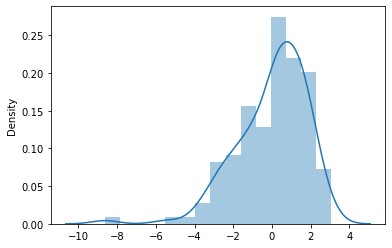

In [34]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.show()

In [35]:
# Add a constant to X_test
X_test = sm.add_constant(x_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [37]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

1.3603977338130597